In [2]:
# Clustering K-Means
import numpy as np
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
import pickle as pk
import sklearn.cluster, sklearn.preprocessing

# Tecnica di machine learning senza supervisione, non c'è addestramento
# Raccoglie campioni (vettori n-dimensionali di numeri reali) in gruppi compatti disgiunti
# Funziona solo se le dimensioni dei vettori hanno estensioni ragionevolmente compatibili, quindi se l'intervallo di una dimensione è troppo grande o piccolo, questo va modificato di scala prima del clustering

In [3]:
alco2009 = pd.read_csv("./code/alco2009.csv", index_col="State")
alco2009.tail()

,Beer,Wine,Spirits
State,,,
Virginia,1.11,0.43,0.59
Washington,1.09,0.51,0.74
West Virginia,1.24,0.10,0.45
Wisconsin,1.49,0.31,1.16
Wyoming,1.45,0.22,1.10


In [4]:
states = pd.read_csv("./code/states.csv", index_col="State")
states.tail()

,Abbreviation
State,
Virginia,VA
Washington,WA
West Virginia,WV
Wisconsin,WI
Wyoming,WY


In [5]:
# Inizializza il modello e fai training
columns = ["Wine", "Beer"]
model = sklearn.cluster.KMeans(n_clusters=9).fit(alco2009[columns])


In [6]:
# Valutazione modello
alco2009["Clusters"] = model.labels_
centers = pd.DataFrame(model.cluster_centers_, columns=columns)

In [7]:
# Aggiungo le abbreviazioni degli Stati quali annotazioni
alco2009withStates = pd.concat([alco2009, states], axis=1)
alco2009withStates.head()

,Beer,Wine,Spirits,Clusters,Abbreviation
State,,,,,
Alabama,1.20,0.22,0.58,6,AL
Alaska,1.31,0.54,1.16,7,AK
Arizona,1.19,0.38,0.74,1,AZ
Arkansas,1.07,0.17,0.60,6,AR
California,1.05,0.55,0.73,0,CA


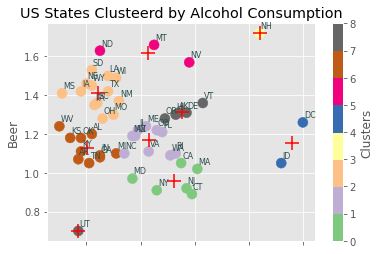

In [8]:
# Tracciamento degli Stati e dei centroidi dei cluster
matplotlib.style.use("ggplot")
ax = alco2009.plot.scatter(columns[0], columns[1], c="Clusters", cmap=plt.cm.Accent, s=100)
centers.plot.scatter(columns[0], columns[1], color="red", marker="+", s=200, ax=ax)
# Applicazione annotate per sigla stati
def add_abbr(state):
    _ = ax.annotate(state["Abbreviation"], state[columns], xytext=(1,5), textcoords="offset points", size=8, color="darkslategrey")
alco2009withStates.apply(add_abbr, axis=1)
# Aggiunge il titolo
plt.title("US States Clusteerd by Alcohol Consumption")
plt.xlabel("Wine")
plt.show()